In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('C:/Users/gpt sorab/Desktop/kaggle/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Statistical Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


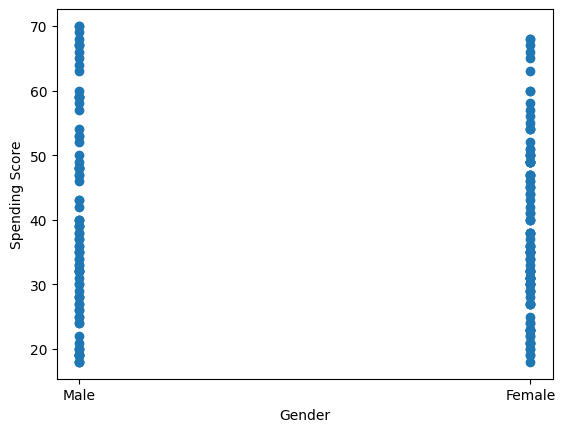

In [9]:
plt.scatter(df['Gender'], df['Age'])
plt.xlabel("Gender")
plt.ylabel("Spending Score")
plt.show()

In [5]:
xi = df[['Annual Income (k$)', 'Spending Score (1-100)']]
x = StandardScaler().fit_transform(xi)

In [10]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

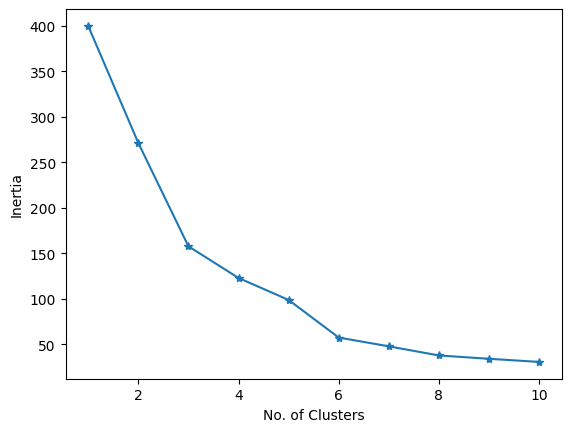

In [11]:
plt.plot(range(1, 11), inertia, marker = '*')
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.show()

In [12]:
km = KMeans(n_clusters=6)
model = km.fit_predict(x)

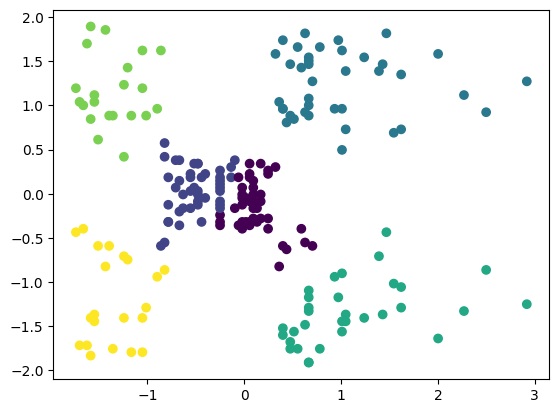

In [14]:
plt.scatter(x[:, 0], x[:, 1], c = model)
plt.show()

In [15]:
print("Silhouette Score", silhouette_score(x, model))

Silhouette Score 0.4562987976956155


In [16]:
print("Inertia ", km.inertia_)

Inertia  57.2894494172146
